In [1]:
# made by Gibeom LEE, HI LAB
# Ìïú Ìè¥Îçî ÎÇ¥ Î™®Îì† csv ÌååÏùºÏùò TENG VppÍ∞íÏùÑ Íµ¨Ìï† Îïå Ïú†Ïö©Ìï©ÎãàÎã§.

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

pristine 0_Vpp: 3.28 V
pristine 0_ÌëúÏ§ÄÌé∏Ï∞®: 0.99


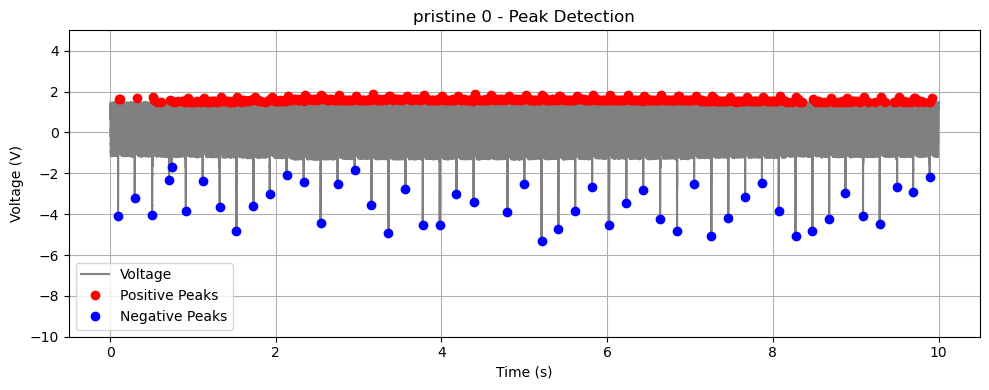

pristine 1_Vpp: 3.57 V
pristine 1_ÌëúÏ§ÄÌé∏Ï∞®: 1.38


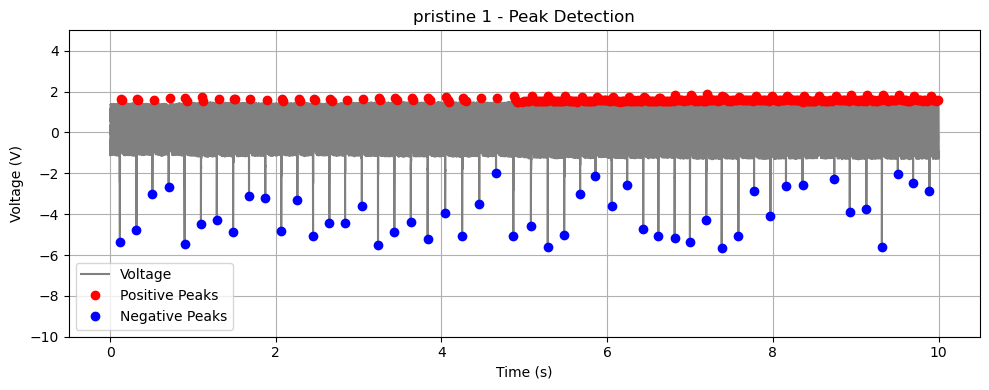

pristine 10_Vpp: 3.12 V
pristine 10_ÌëúÏ§ÄÌé∏Ï∞®: 0.47


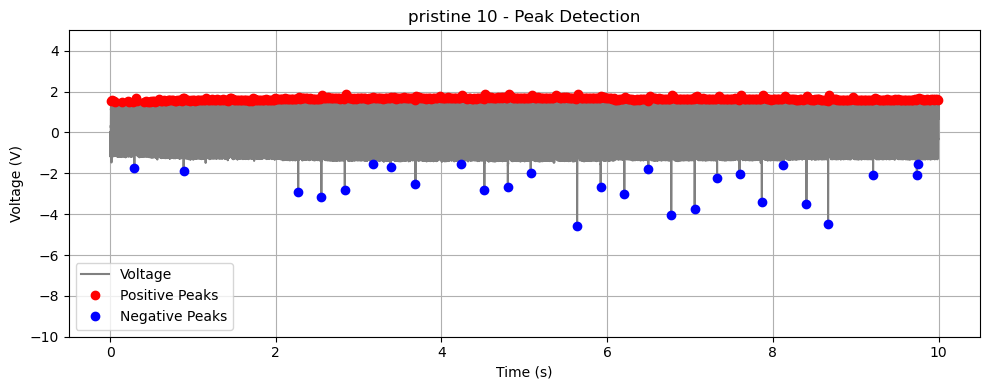

pristine 15_Vpp: 3.13 V
pristine 15_ÌëúÏ§ÄÌé∏Ï∞®: 0.65


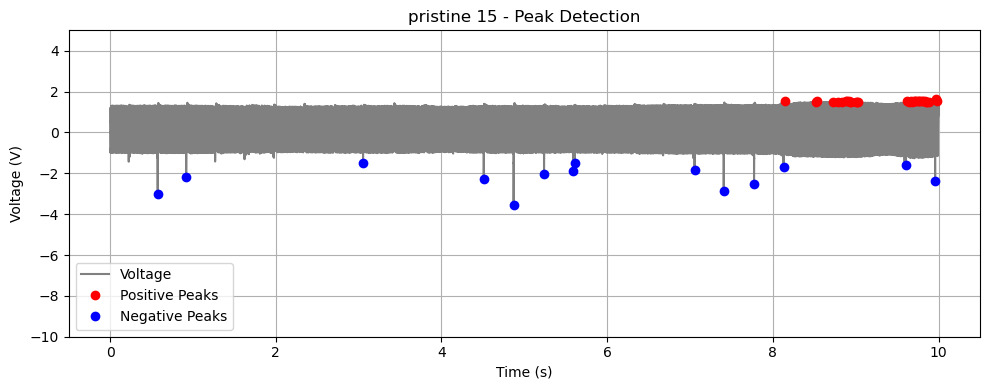

pristine 2_Vpp: 3.57 V
pristine 2_ÌëúÏ§ÄÌé∏Ï∞®: 1.21


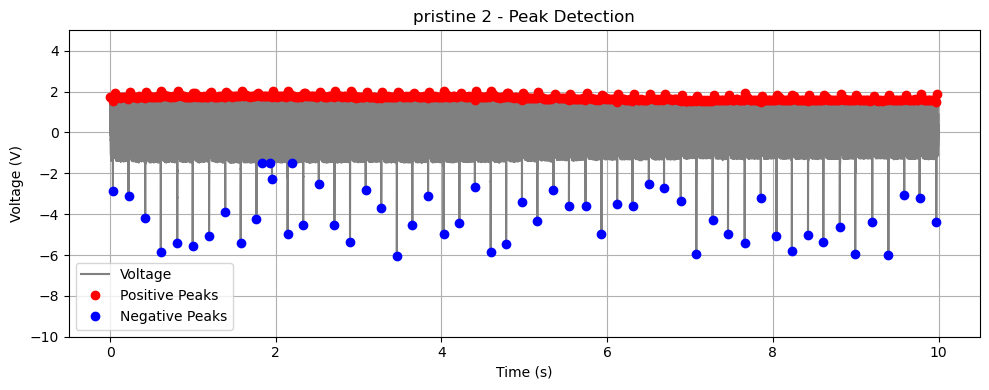

pristine 20_Vpp: 2.96 V
pristine 20_ÌëúÏ§ÄÌé∏Ï∞®: 0.22


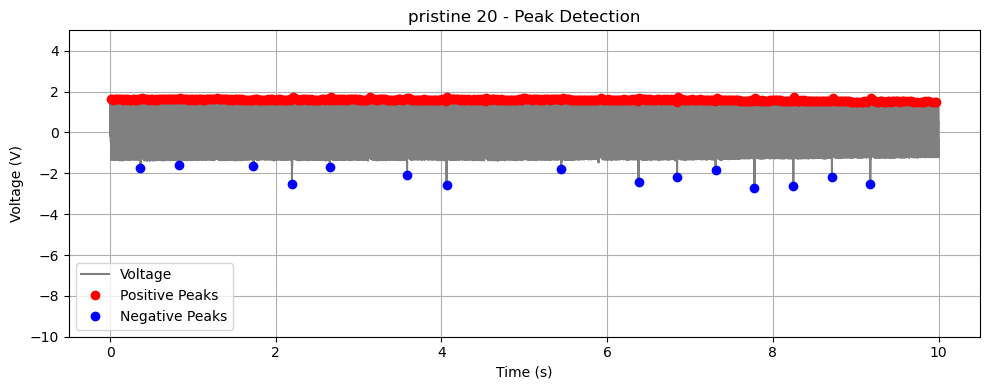

pristine 25_Vpp: 3.57 V
pristine 25_ÌëúÏ§ÄÌé∏Ï∞®: 0.54


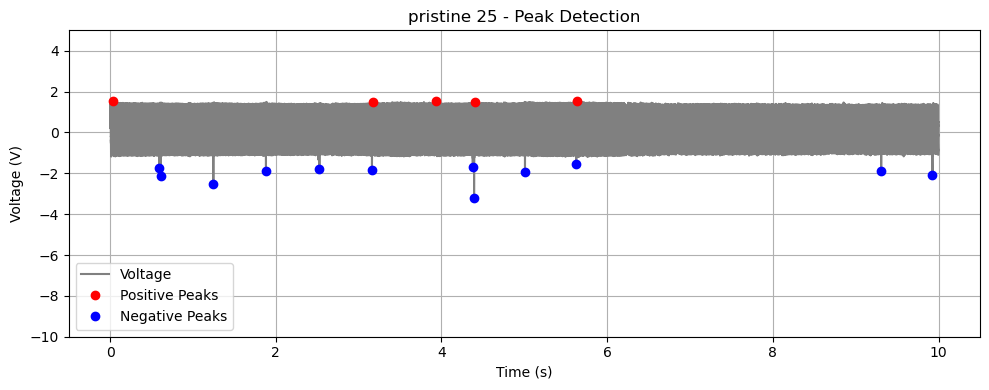

pristine 3_Vpp: 3.36 V
pristine 3_ÌëúÏ§ÄÌé∏Ï∞®: 1.10


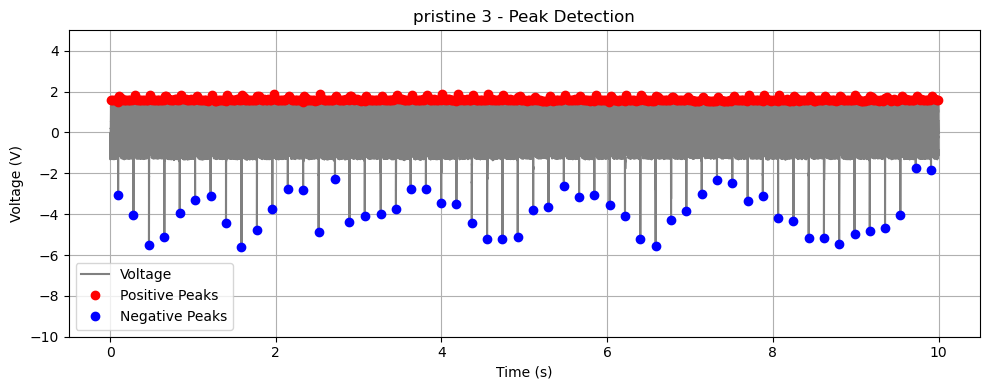

pristine 30_Vpp: 2.80 V
pristine 30_ÌëúÏ§ÄÌé∏Ï∞®: 0.23


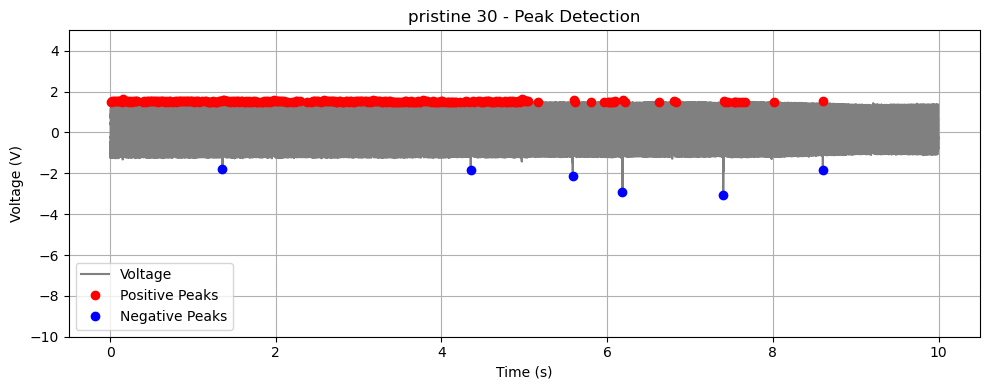

pristine 4_Vpp: 3.24 V
pristine 4_ÌëúÏ§ÄÌé∏Ï∞®: 0.83


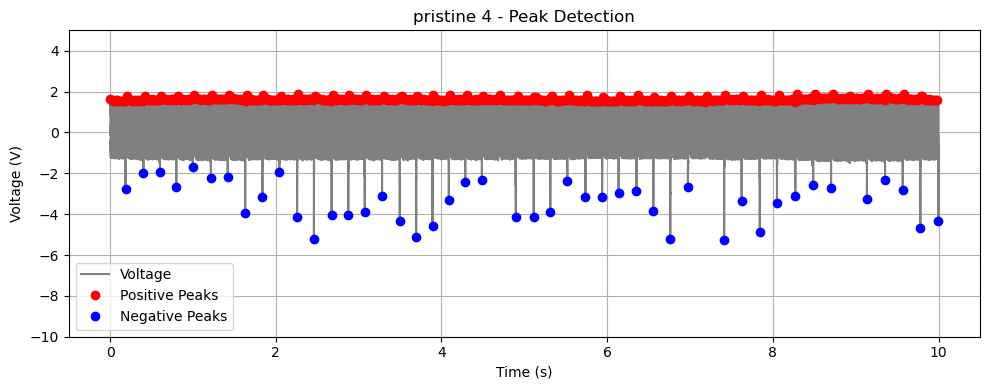

pristine 5_Vpp: 3.39 V
pristine 5_ÌëúÏ§ÄÌé∏Ï∞®: 0.94


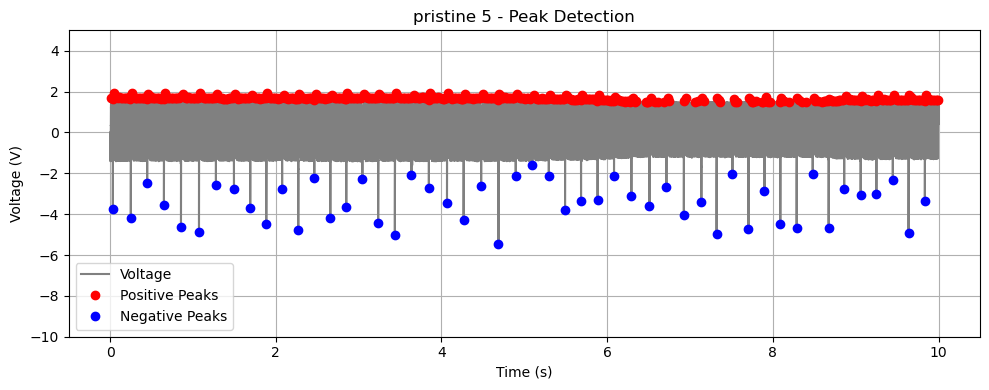


üìä Î™®Îì† ÌååÏùºÏùò ÌèâÍ∑† Vpp Í∞í Î™©Î°ù
pristine 0.csv: 3.28 V
pristine 1.csv: 3.57 V
pristine 10.csv: 3.12 V
pristine 15.csv: 3.13 V
pristine 2.csv: 3.57 V
pristine 20.csv: 2.96 V
pristine 25.csv: 3.57 V
pristine 3.csv: 3.36 V
pristine 30.csv: 2.80 V
pristine 4.csv: 3.24 V
pristine 5.csv: 3.39 V

üìà Ï†ÑÏ≤¥ ÌèâÍ∑† Vpp: 3.27 V
üìâ ÌëúÏ§ÄÌé∏Ï∞® (ÏóêÎü¨Î∞î): 0.26 V


In [11]:
# -------------------------------
# Ìè¥Îçî Í≤ΩÎ°ú Î∞è ÏÑ§Ï†ï
folder_path = r"c:\Users\limye\OneDrive - gachon.ac.kr\HI Lab\0. Projects\0. On going\2. Aloe inspired DEG\0. Ïã§ÌóòÏûêÎ£å\2. Collecting data\250703_Pristine vs O-E\pristine"

height = 1.5  # find_peaks ÏµúÏÜå ÎÜíÏù¥
relative_threshold_ratio = 0.2  # ÏµúÎåÄ ÌîºÌÅ¨ ÎåÄÎπÑ ÎπÑÏú®
common_ylim = (-10, 5)  # Í∑∏ÎûòÌîÑ yÏ∂ï ÌÜµÏùº
distance = 1000

# CSV ÌååÏùº Î™©Î°ù
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]
all_vpp_values = []

# -------------------------------
# ÌååÏùºÎ≥Ñ Ï≤òÎ¶¨
for file_name in csv_files:
    file_path = os.path.join(folder_path, file_name)
    try:
        # Îç∞Ïù¥ÌÑ∞ Î°úÎìú
        data = pd.read_csv(file_path)
        time = data.iloc[:, 0].values
        voltage = data.iloc[:, 1].values

        # ÌîºÌÅ¨ ÌÉêÏßÄ
        pos_peaks, _ = find_peaks(voltage, height=height, distance=distance)
        neg_peaks, _ = find_peaks(-voltage, height=height, distance=distance)

        # ÌîºÌÅ¨Í∞Ä ÏóÜÏúºÎ©¥ Ï≤òÎ¶¨
        if len(pos_peaks) + len(neg_peaks) == 0:
            print(f"{file_name}: Ïú†Ìö®Ìïú ÌîºÌÅ¨ ÏóÜÏùå")
            mean_vpp = 0
            pos_peaks_filtered = np.array([], dtype=int)
            neg_peaks_filtered = np.array([], dtype=int)
        else:
            # ÏµúÎåÄ ÌîºÌÅ¨ Í∞í Í≥ÑÏÇ∞
            all_peaks_combined = np.concatenate((pos_peaks, neg_peaks))
            max_peak_val = np.max(np.abs(voltage[all_peaks_combined]))
            threshold = max_peak_val * relative_threshold_ratio

            # ÌïÑÌÑ∞ÎßÅ + Ï†ïÏàò Ïù∏Îç±Ïä§ Í∞ïÏ†ú
            pos_peaks_filtered = np.array([p for p in pos_peaks if abs(voltage[p]) >= threshold], dtype=int)
            neg_peaks_filtered = np.array([p for p in neg_peaks if abs(voltage[p]) >= threshold], dtype=int)

            # ÌîºÌÅ¨ Í≤∞Ìï© ÌõÑ Ï†ïÎ†¨
            all_peaks = np.sort(np.concatenate((pos_peaks_filtered, neg_peaks_filtered)))
            
            # Vpp Í≥ÑÏÇ∞
            vpp_list = []
            for i in range(len(all_peaks) - 1):
                start = int(all_peaks[i])
                end = int(all_peaks[i + 1])
                vpp = np.max(voltage[start:end + 1]) - np.min(voltage[start:end + 1])
                vpp_list.append(vpp)

            mean_vpp = np.mean(vpp_list) if vpp_list else 0
            std = np.std(vpp_list, ddof=1)

        # Í≤∞Í≥º Ï†ÄÏû•
        all_vpp_values.append(mean_vpp)
        base_name = os.path.splitext(file_name)[0]
        print(f"{base_name}_Vpp: {mean_vpp:.2f} V")
        print(f"{base_name}_ÌëúÏ§ÄÌé∏Ï∞®: {std:.2f}")   

        # -------------------------------
        # Í∑∏ÎûòÌîÑ Ï∂úÎ†• (ÏΩîÎìú 1Ìöå ÏûëÏÑ±)
        plt.figure(figsize=(10, 4))
        plt.plot(time, voltage, color='gray', label='Voltage')
        if len(pos_peaks_filtered) > 0:
            plt.plot(time[pos_peaks_filtered], voltage[pos_peaks_filtered], 'ro', label='Positive Peaks')
        if len(neg_peaks_filtered) > 0:
            plt.plot(time[neg_peaks_filtered], voltage[neg_peaks_filtered], 'bo', label='Negative Peaks')
        plt.title(f"{base_name} - Peak Detection")
        plt.xlabel("Time (s)")
        plt.ylabel("Voltage (V)")
        plt.ylim(common_ylim)
        plt.grid(True)
        plt.legend()
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"{file_name} Ï≤òÎ¶¨ Ï§ë Ïò§Î•ò Î∞úÏÉù: {e}")

# -------------------------------
# Ï†ÑÏ≤¥ Vpp ÏöîÏïΩ
print("\n==============================")
print("üìä Î™®Îì† ÌååÏùºÏùò ÌèâÍ∑† Vpp Í∞í Î™©Î°ù")
for i, vpp in enumerate(all_vpp_values):
    print(f"{csv_files[i]}: {vpp:.2f} V")

if all_vpp_values:
    overall_mean = np.mean(all_vpp_values)
    overall_std = np.std(all_vpp_values, ddof=1)
    print("\n==============================")
    print(f"üìà Ï†ÑÏ≤¥ ÌèâÍ∑† Vpp: {overall_mean:.2f} V")
    print(f"üìâ ÌëúÏ§ÄÌé∏Ï∞® (ÏóêÎü¨Î∞î): {overall_std:.2f} V")
else:
    print("üì≠ Vpp Îç∞Ïù¥ÌÑ∞Î•º Í≥ÑÏÇ∞Ìï† Ïàò ÏóÜÏäµÎãàÎã§.")
